In [2]:
from tehran_stocks import db, Stocks, StockPrice, get_all_price
# %pip install nest_asyncio
# import nest_asyncio; nest_asyncio.apply()


In [3]:
Stocks.query.count()

756

In [5]:
StockPrice.query.order_by(StockPrice.date.desc()).first().date

20220703

In [9]:
Stocks??

Init signature: Stocks(**kwargs)
Docstring:      <no docstring>
Source:        
class Stocks(Base):
    __tablename__ = "stocks"

    id = Column(Integer, primary_key=True)
    name = Column(String)
    title = Column(String)
    group_name = Column(String)
    group_code = Column(Integer)
    instId = Column(String)
    insCode = Column(String)
    code = Column(String, unique=True)
    sectorPe = Column(Float)
    shareCount = Column(Float)
    estimatedEps = Column(Float)
    baseVol = Column(Float)
    prices = relationship("StockPrice", backref="stock")
    _cached = False
    _dfcounter = 0

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    @property
    def df(self) -> pd.DataFrame:
        """dataframe of stock price with date and OHLC"""
        self._dfcounter += 1
        if self._cached:
            return self._df
        query = f"select * from stock_price where code = '{self.code}'"
        df = pd.read_sql(query, engine)
        if df.empty:
    

In [8]:
Stocks.query.filter(Stocks.title.like('%خودرو%')).all()

[الكتريك‌ خودرو شرق‌ (خشرق) - بازار دوم بورس',FaraDesc ='-خشرق-خودرو و ساخت قطعات,
 گسترش‌سرمايه‌گذاري‌ايران‌خودرو (خگستر) - بازار اول (تابلوي اصلي) بورس',FaraDesc ='-خگستر-خودرو و ساخت قطعات,
 ايران‌ خودرو (خودرو) - بازار دوم بورس',FaraDesc ='-خودرو-خودرو و ساخت قطعات,
 توليدمحورخودرو (خمحور) - بازار دوم بورس',FaraDesc ='-خمحور-خودرو و ساخت قطعات,
 گروه اقتصادي كرمان خودرو (خكرمان) - بازار پايه زرد فرابورس',FaraDesc ='قانون احکام دائمی برنامه های توسعه کشور-خكرمان-خودرو و ساخت قطعات,
 محورسازان‌ايران‌خودرو (خوساز) - بازار دوم بورس',FaraDesc ='-خوساز-خودرو و ساخت قطعات,
 پارس‌ خودرو (خپارس) - بازار دوم بورس',FaraDesc ='-خپارس-خودرو و ساخت قطعات,
 ليزينگ‌خودروغدير (ولغدر) - بازار اول (تابلوي فرعي) بورس',FaraDesc ='-ولغدر-ساير واسطه گريهاي مالي,
 ايران خودرو ديزل (خاور) - بازار پايه زرد فرابورس',FaraDesc ='لغو پذیرش شده-خاور-خودرو و ساخت قطعات,
 ح . ايران خودرو ديزل (خاورح) - بازار پايه زرد فرابورس',FaraDesc ='لغو پذیرش شده-خاورح-خودرو و ساخت قطعات]

In [23]:
# Stocks.query.filter(Stocks.group_code==13).all()

In [25]:
stock =Stocks.query.filter(Stocks.code=='7745894403636165').first()

In [21]:
# db.session.query(Stocks.group_code, Stocks.group_name).group_by(Stocks.group_code).all()
db.session.rollback()
db.session.execute('select group_name , group_code from stocks group by group_name , group_code').fetchall()


[('حمل و نقل آبي', 61),
 ('محصولات شيميايي', 44),
 ('بانكها و موسسات اعتباري', 57),
 ('ساير محصولات كاني غيرفلزي', 54),
 ('استخراج نفت گاز و خدمات جنبي جز اكتشاف', 11),
 ('پيمانكاري صنعتي', 45),
 ('فعاليتهاي فرهنگي و ورزشي', 93),
 ('صندوق سرمايه گذاري قابل معامله', 68),
 ('سيمان، آهك و گچ', 53),
 ('بيمه وصندوق بازنشستگي به جزتامين اجتماعي', 66),
 ('مخابرات', 64),
 ('منسوجات', 17),
 ('توليد محصولات كامپيوتري الكترونيكي ونوري', 26),
 ('خدمات فني و مهندسي', 74),
 ('ماشين آلات و تجهيزات', 29),
 ('انبوه سازي، املاك و مستغلات', 70),
 ('ماشين آلات و دستگاه\u200cهاي برقي', 31),
 ('ساير واسطه گريهاي مالي', 58),
 ('مواد و محصولات دارويي', 43),
 ('محصولات چوبي', 20),
 ('فراورده هاي نفتي، كك و سوخت هسته اي', 23),
 ('ساخت دستگاه\u200cها و وسايل ارتباطي', 32),
 ('ساخت محصولات فلزي', 28),
 ('كاشي و سراميك', 49),
 ('فعاليت مهندسي، تجزيه، تحليل و آزمايش فني', 71),
 ('فعاليتهاي كمكي به نهادهاي مالي واسط', 67),
 ('اطلاعات و ارتباطات', 73),
 ('شركتهاي چند رشته اي صنعتي', 39),
 ('خودرو و ساخت قطعات', 34),


In [27]:
stock.get_instant_detail()

# # get change in share count
# stock.get_shares_history()

# # get change in price ~ dividend, split, etc.
# stock.get_dividend()


{'time': '12:29:58',
 'last_price': '6840',
 'last_close': '6840',
 'last_high': '6790',
 'last_low': '6800',
 'last_open': '6970',
 'trade_count': '6710',
 'trade_volume': '8929',
 'trade_value': '86398774',
 'market_cap': '591310468620',
 'date_string': '20220703',
 'time_string': '122958'}

In [28]:
stock.get_shares_history()

,date,new_shares,old_shares,gdate
0,1401-01-29 00:00:00,190.000 B,139.474 B,2022-04-18
1,1400-08-30 00:00:00,139.474 B,76.000 B,2021-11-21
2,1399-07-20 00:00:00,76.000 B,51.000 B,2020-10-11
3,1398-07-21 00:00:00,51.000 B,20.000 B,2019-10-13
4,1394-05-06 00:00:00,20.000 B,10.000 B,2015-07-28
5,1392-12-25 00:00:00,10.000 B,4.162 B,2014-03-16


In [29]:
stock.get_dividend()

,date,after,before,dividend,gdate
0,1400-05-04 00:00:00,12560,13760,1200,2021-07-26
1,1399-04-29 00:00:00,37220,37620,400,2020-07-19
2,1398-04-29 00:00:00,10915,11715,800,2019-07-20
3,1397-04-31 00:00:00,3933,4233,300,2018-07-22
4,1396-05-02 00:00:00,2796,3046,250,2017-07-24
5,1395-05-03 00:00:00,2594,2794,200,2016-07-24
6,1394-05-06 00:00:00,2695,5391,2696,2015-07-28
7,1394-05-05 00:00:00,5391,5971,580,2015-07-27
8,1393-05-14 00:00:00,9751,11251,1500,2014-08-05
9,1392-12-25 00:00:00,11251,27031,15780,2014-03-16


<AxesSubplot:xlabel='date'>

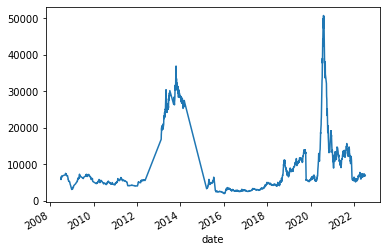

In [32]:
stock.df['close'].plot()